In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

In [2]:
df = pd.read_csv('./output_preprocessed.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(1)

,authors,title of paper,journal name,citations,doi,page no,month of publication,year of publication,ISSN,url,Journal_encoded
0,"Andrija Goranović, Marcus Meisel, Stefan Wilke...",Hyperledger Fabric Smart Grid Communication Te...,IEEE Conference Publication,5.0,10.1109/WFCS.2019.8758000,27-29 May 2019,July,2019.0,1882-2161.0,https://ieeexplore.ieee.org/abstract/document/...,2


In [3]:
# encoding
scaler = MinMaxScaler()
df['citations'] = scaler.fit_transform(df['citations'].values.reshape(-1, 1))
df['Journal_encoded'] = scaler.fit_transform(df['Journal_encoded'].values.reshape(-1, 1))
df.head(1)

,authors,title of paper,journal name,citations,doi,page no,month of publication,year of publication,ISSN,url,Journal_encoded
0,"Andrija Goranović, Marcus Meisel, Stefan Wilke...",Hyperledger Fabric Smart Grid Communication Te...,IEEE Conference Publication,0.008511,10.1109/WFCS.2019.8758000,27-29 May 2019,July,2019.0,1882-2161.0,https://ieeexplore.ieee.org/abstract/document/...,0.5


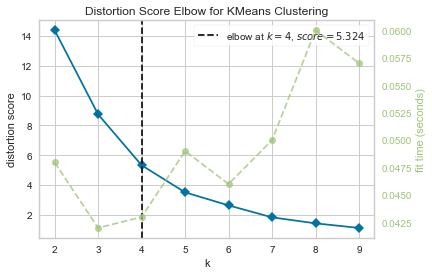

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
model  = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df[['Journal_encoded','citations']])
visualizer.show()

In [5]:
model.n_clusters = 4
model_predicted = model.fit_predict(df[['Journal_encoded','citations']])

In [6]:
df['cluster'] = model_predicted

In [7]:
centroid = model.cluster_centers_
x_c = [i[0] for i in centroid]
y_c = [i[1] for i in centroid]
# print(x_c)
# print(y_c)

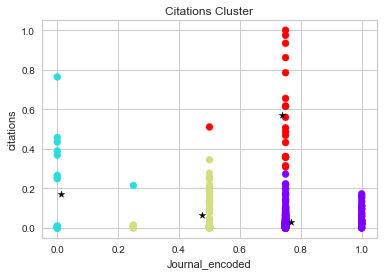

In [8]:
plt.scatter(df['Journal_encoded'], df['citations'],c=df['cluster'], cmap='rainbow')
plt.scatter(x_c,y_c, c='black', marker="*")
plt.xlabel('Journal_encoded')
plt.ylabel('citations')
plt.title('Citations Cluster')
plt.show()

In [9]:
# printing accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(df['cluster'], model_predicted))

1.0


In [11]:
# inertia score
print(model.inertia_)

5.323754374656721


In [12]:
# silhouette score
from sklearn.metrics import silhouette_score
print(silhouette_score(df[['Journal_encoded','citations']], model_predicted))

0.7578305433434567
